# Medallia technical assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

In [54]:
df = pd.read_csv('../april-data.csv', parse_dates=True, index_col=0)

In [55]:
df.head()

,Brand,Category,Mealtime,Visit Count
Date,,,,
2017-04-01,A&W Restaurant,Burger,Afternoon Snack,39
2017-04-01,A&W Restaurant,Burger,Breakfast,30
2017-04-01,A&W Restaurant,Burger,Dinner,67
2017-04-01,A&W Restaurant,Burger,Late Night,1
2017-04-01,A&W Restaurant,Burger,Lunch,92


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10279 entries, 2017-04-01 to 2017-04-30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        10279 non-null  object
 1   Category     10279 non-null  object
 2   Mealtime     10279 non-null  object
 3   Visit Count  10279 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 401.5+ KB


## Create aggregations of the data

In [57]:
# make list of brands
brands = [x for x in df['Brand'].value_counts().keys()]

In [58]:
brands

['Krystal',
 'Starbucks Coffee',
 "Togo's",
 'Whataburger',
 'Sonic Drive-In',
 "McDonald's",
 'Dairy Queen',
 "Papa John's Pizza",
 "Domino's Pizza",
 "Checkers / Rally's",
 'Jamba Juice',
 "Bojangles'",
 'Smoothie King',
 'KFC',
 'Subway',
 'White Castle',
 "Carl's Jr.",
 'Del Taco',
 'Popeyes Louisiana Kitchen',
 'Burger King',
 'Chick-fil-A',
 "Arby's",
 'Pizza Hut',
 "Dunkin' Donuts",
 "Wendy's",
 'Tim Hortons',
 'In-N-Out Burger',
 "Steak 'n Shake",
 'Jack in the Box',
 'Taco Bell',
 "Hardee's",
 'Quiznos',
 "Long John Silver's Seafood",
 'Tropical Smoothie Cafe',
 'Baskin-Robbins',
 'Little Caesars Pizza',
 "Taco John's",
 "Church's Chicken",
 'Krispy Kreme',
 'El Pollo Loco',
 'Wienerschnitzel',
 "Captain D's Seafood Restaurants",
 "Godfather's Pizza",
 'Golden Corral',
 "Culver's",
 'Potbelly Sandwich Shop',
 "Hungry Howie's Pizza",
 'A&W Restaurant',
 "Braum's Ice Cream & Dairy",
 'Cold Stone Creamery',
 "Papa Murphy's Take 'N' Bake Pizza",
 'Caribou Coffee',
 "Luby's",
 "Chu

In [22]:
# make list of categories
categories = [x for x in df['Category'].value_counts().keys()]

In [24]:
categories

['Pizza',
 'Burger',
 'Family Casual',
 'Specialty',
 'Chicken',
 'Sandwich',
 'Frozen Desserts',
 'Coffee Cafe',
 'Mexican']

In [27]:
# make list of mealtimes
mealtimes = [x for x in df['Mealtime'].value_counts().keys()]

In [28]:
mealtimes

['Lunch', 'Dinner', 'Afternoon Snack', 'Breakfast', 'Late Night']

In [74]:
agg_brand['Krystal'] = df[df['Brand'] == brands[0]].resample('D').mean()

In [76]:
agg_brand.drop(columns='Visit Count', inplace=True)

In [78]:
agg_brand.head(2)

,Krystal
Date,
2017-04-01,61.4
2017-04-02,47.4


In [81]:
brand_agg = df[df['Brand'] == brands[1]].resample('D').mean()

In [82]:
brand_agg

,Visit Count
Date,
2017-04-01,2547.2
2017-04-02,2055.8
2017-04-03,2232.0
2017-04-04,2229.6
2017-04-05,2257.2
2017-04-06,2349.0
2017-04-07,2773.0
2017-04-08,2392.0
2017-04-09,1965.4


### Aggregate daily traffic per store into average

In [83]:
for i in range(1, len(brands)):
    brand_agg = df[df['Brand'] == brands[i]].resample('D').mean()
    agg_brand[brands[i]] = brand_agg

In [85]:
agg_brand.head(2)

,Krystal,Starbucks Coffee,Togo's,Whataburger,Sonic Drive-In,McDonald's,Dairy Queen,Papa John's Pizza,Domino's Pizza,Checkers / Rally's,...,Old Country Buffet,Papa Gino's,Peter Piper Pizza,Souplantation & Sweet Tomatoes,Jet's Pizza,Pizza Ranch,Western Sizzlin,Fox's Pizza Den,Cinnabon,Auntie Anne's Soft Pretzels
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,61.4,2547.2,36.6,334.0,931.8,4441.0,636.4,115.2,110.8,124.2,...,18.75,7.20,25.0,48.75,6.2,27.0,28.0,6.25,1.5,1.0
2017-04-02,47.4,2055.8,26.2,261.4,717.8,3499.8,593.6,79.0,80.6,101.8,...,14.75,8.75,16.5,43.00,7.2,18.0,23.5,6.25,1.5,NaN


<AxesSubplot:xlabel='Date'>

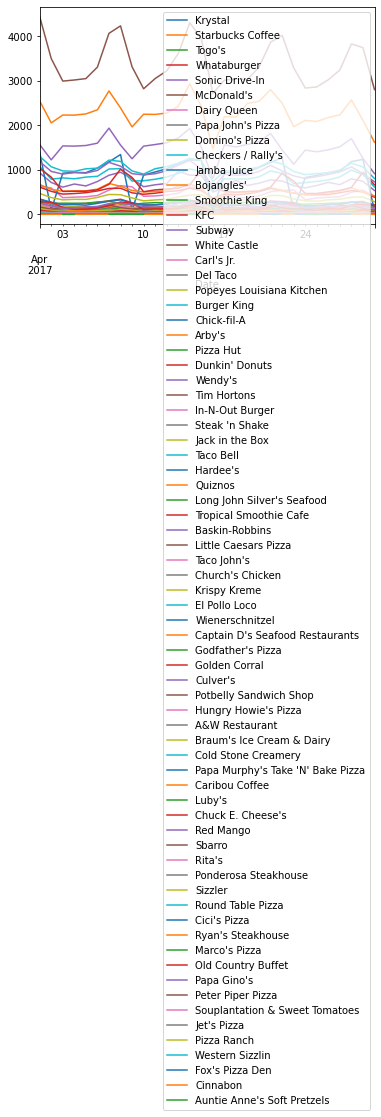

In [86]:
agg_brand.plot()

In [100]:
# make list of top 10
top_10 = [x for x in agg_brand.sum().sort_values(ascending=False)[:10].keys()]

In [101]:
top_10

["McDonald's",
 'Starbucks Coffee',
 'Subway',
 'Taco Bell',
 "Wendy's",
 'Chick-fil-A',
 'Burger King',
 'Sonic Drive-In',
 "Dunkin' Donuts",
 "Arby's"]

## Explore data with graphs

<AxesSubplot:xlabel='Date'>

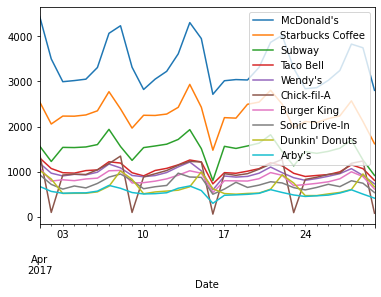

In [106]:
agg_brand[top_10].plot()

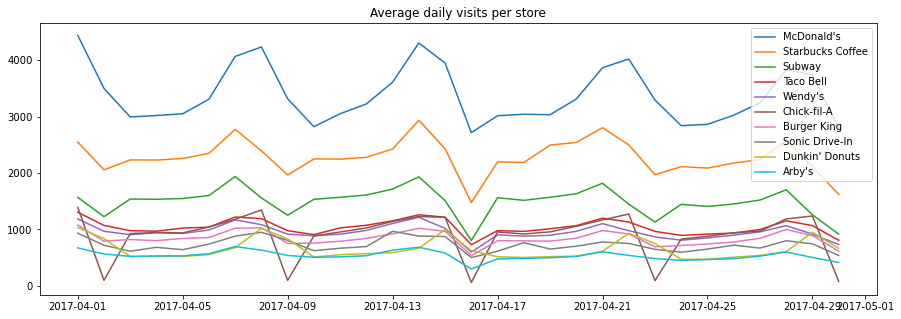

In [130]:
plt.figure(figsize=(15, 5))
plt.plot(agg_brand[top_10])
plt.legend(top_10)
plt.title('Average daily visits per store');

In [121]:
mcd = df[df['Brand'] == "McDonald's"]
sbux = df[df['Brand'] == "Starbucks Coffee"]
sway = df[df['Brand'] == "Subway"]
taco = df[df['Brand'] == "Taco Bell"]
wendys = df[df['Brand'] == "Wendy's"]

In [128]:
mcd.head()

,Brand,Category,Mealtime,Visit Count
Date,,,,
2017-04-01,McDonald's,Burger,Afternoon Snack,2195
2017-04-01,McDonald's,Burger,Breakfast,6970
2017-04-01,McDonald's,Burger,Dinner,4867
2017-04-01,McDonald's,Burger,Late Night,915
2017-04-01,McDonald's,Burger,Lunch,7258


In [137]:
top_5 = pd.concat([mcd, sbux, sway, taco, wendys])

In [147]:
five = ["McDonald's", "Starbucks", "Subway", "Taco Bell", "Wendy's"]

In [139]:
top_5.head()

,Brand,Category,Mealtime,Visit Count
Date,,,,
2017-04-01,McDonald's,Burger,Afternoon Snack,2195
2017-04-01,McDonald's,Burger,Breakfast,6970
2017-04-01,McDonald's,Burger,Dinner,4867
2017-04-01,McDonald's,Burger,Late Night,915
2017-04-01,McDonald's,Burger,Lunch,7258


In [143]:
snack = top_5[top_5['Mealtime'] == 'Afternoon Snack']
breakfast = top_5[top_5['Mealtime'] == 'Breakfast']
dinner = top_5[top_5['Mealtime'] == 'Dinner']
late = top_5[top_5['Mealtime'] == 'Late Night']
lunch = top_5[top_5['Mealtime'] == 'Lunch']

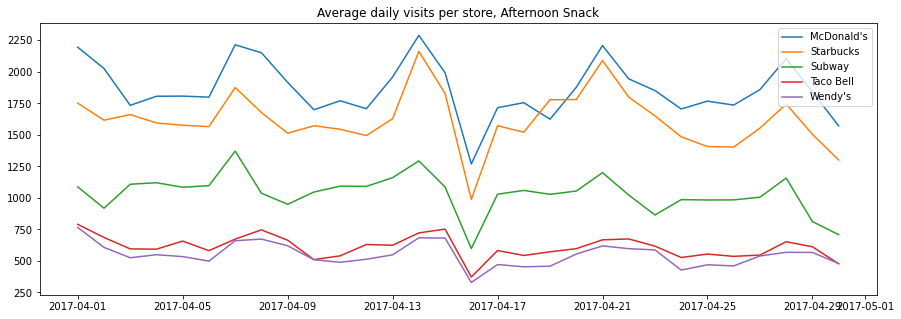

In [151]:
plt.figure(figsize=(15, 5))
plt.plot(snack[snack['Brand'] == "McDonald's"]['Visit Count'])
plt.plot(snack[snack['Brand'] == "Starbucks Coffee"]['Visit Count'])
plt.plot(snack[snack['Brand'] == "Subway"]['Visit Count'])
plt.plot(snack[snack['Brand'] == "Taco Bell"]['Visit Count'])
plt.plot(snack[snack['Brand'] == "Wendy's"]['Visit Count'])
plt.legend(five)
plt.title('Average daily visits per store, Afternoon Snack');

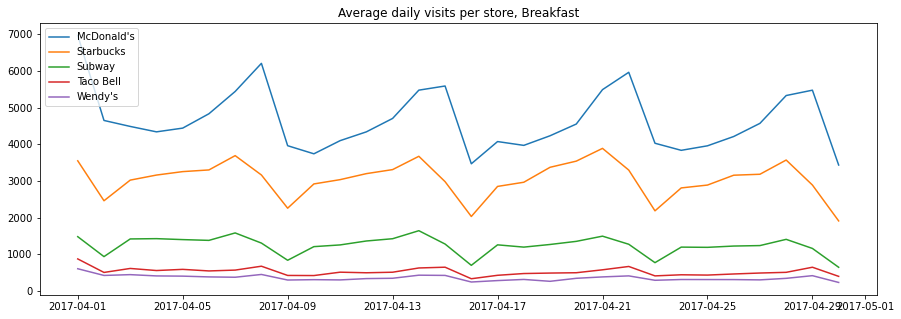

In [153]:
plt.figure(figsize=(15, 5))
plt.plot(breakfast[breakfast['Brand'] == "McDonald's"]['Visit Count'])
plt.plot(breakfast[breakfast['Brand'] == "Starbucks Coffee"]['Visit Count'])
plt.plot(breakfast[breakfast['Brand'] == "Subway"]['Visit Count'])
plt.plot(breakfast[breakfast['Brand'] == "Taco Bell"]['Visit Count'])
plt.plot(breakfast[breakfast['Brand'] == "Wendy's"]['Visit Count'])
plt.legend(five)
plt.title('Average daily visits per store, Breakfast');

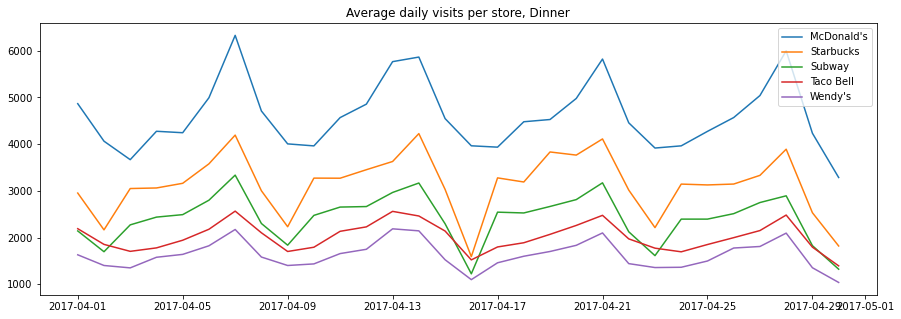

In [154]:
plt.figure(figsize=(15, 5))
plt.plot(dinner[dinner['Brand'] == "McDonald's"]['Visit Count'])
plt.plot(dinner[dinner['Brand'] == "Starbucks Coffee"]['Visit Count'])
plt.plot(dinner[dinner['Brand'] == "Subway"]['Visit Count'])
plt.plot(dinner[dinner['Brand'] == "Taco Bell"]['Visit Count'])
plt.plot(dinner[dinner['Brand'] == "Wendy's"]['Visit Count'])
plt.legend(five)
plt.title('Average daily visits per store, Dinner');

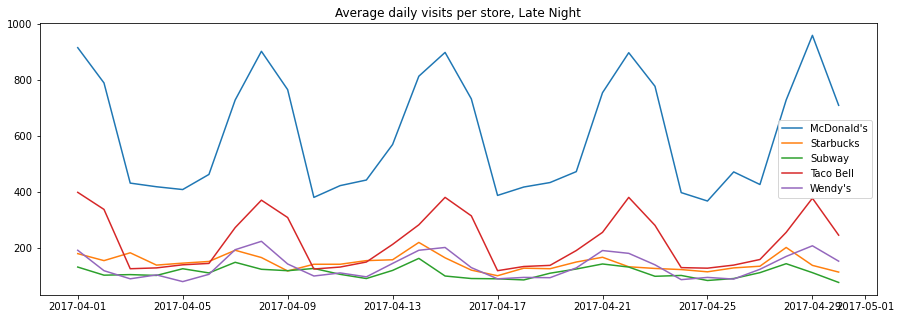

In [156]:
plt.figure(figsize=(15, 5))
plt.plot(late[late['Brand'] == "McDonald's"]['Visit Count'])
plt.plot(late[late['Brand'] == "Starbucks Coffee"]['Visit Count'])
plt.plot(late[late['Brand'] == "Subway"]['Visit Count'])
plt.plot(late[late['Brand'] == "Taco Bell"]['Visit Count'])
plt.plot(late[late['Brand'] == "Wendy's"]['Visit Count'])
plt.legend(five)
plt.title('Average daily visits per store, Late Night');

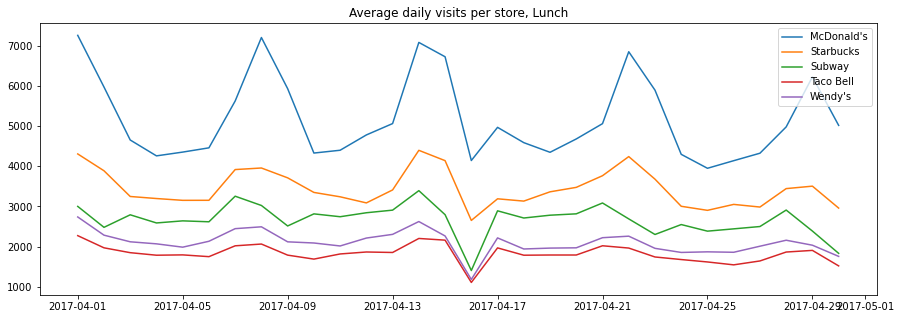

In [158]:
plt.figure(figsize=(15, 5))
plt.plot(lunch[lunch['Brand'] == "McDonald's"]['Visit Count'])
plt.plot(lunch[lunch['Brand'] == "Starbucks Coffee"]['Visit Count'])
plt.plot(lunch[lunch['Brand'] == "Subway"]['Visit Count'])
plt.plot(lunch[lunch['Brand'] == "Taco Bell"]['Visit Count'])
plt.plot(lunch[lunch['Brand'] == "Wendy's"]['Visit Count'])
plt.legend(five)
plt.title('Average daily visits per store, Lunch');

Text(0.5, 1.0, 'Average weekly visits per store, top 5 chains')

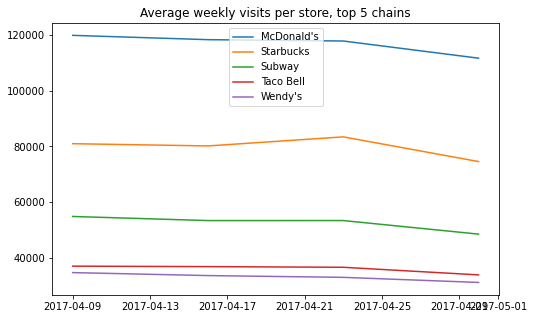

In [172]:
plt.figure(figsize=(8, 5))
plt.plot(mcd.loc['2017-04-03':].resample('W').sum())
plt.plot(sbux.loc['2017-04-03':].resample('W').sum())
plt.plot(sway.loc['2017-04-03':].resample('W').sum())
plt.plot(taco.loc['2017-04-03':].resample('W').sum())
plt.plot(wendys.loc['2017-04-03':].resample('W').sum())
plt.legend(five)
plt.title('Average weekly visits per store, top 5 chains')


## Export data

In [160]:
agg_brand.to_csv('../agg_brand.csv')

In [161]:
snack.to_csv('../snack.csv')
breakfast.to_csv('../breakfast.csv')
dinner.to_csv('../dinner.csv')
late.to_csv('../late.csv')
lunch.to_csv('../lunch.csv')